Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 07: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, January 11, 2022**. Therefore, the sheet is a bit longer and you can get a total of 26 points. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

**HINT: There is a bonus exercise in the end. If you do this bonus exercise you may leave out one of the other exercises.**

## Assignment 0: Math recap (Expectation and Variance) [0 Points] 

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is the relation between mean and expectated value? How to compute it?

YOUR ANSWER HERE

**b)** What is the variance? What does it express? Why is there a square in the formula?

YOUR ANSWER HERE

**c)** Can you compute mean and variance of a given 1-dimensional dataset (e.g., $D=\{9,10,11,7,13\}$). Can you do the same for a 3-dimensional dataset (e.g., D=\{(1,10,9), (1,10,10), (10,10,11), (19,10,7), (19,10,13)\})?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE

## Exercise 1: Understanding Fourier Transform [7 points]

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

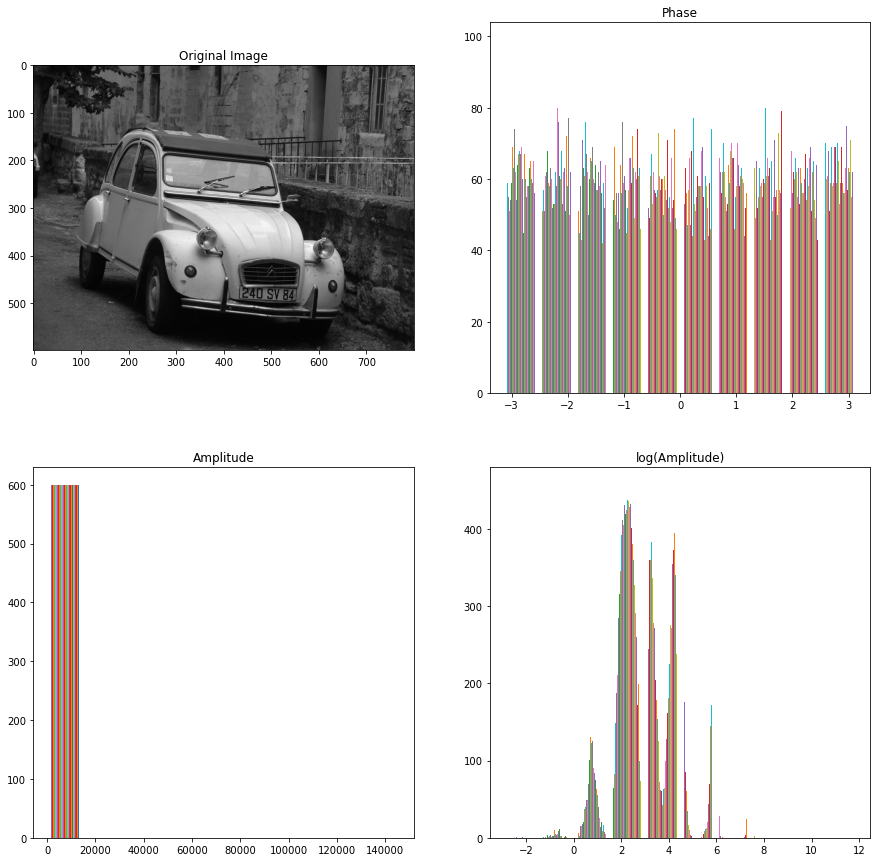

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

img = plt.imread('images/dolly.png')

# YOUR CODE HERE
img_fft = np.fft.fft2(img)
amplitude = np.abs(img_fft)
log_amplitude = np.log(amplitude)
phase = np.angle(img_fft)


plt.figure(figsize=(15, 15))

plt.gray()
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(2,2,2)
plt.title("Phase")
plt.hist(phase)

plt.subplot(2,2,3)
plt.title("Amplitude")
plt.hist(amplitude)

plt.subplot(2,2,4)
plt.title("log(Amplitude)")
plt.hist(log_amplitude)

plt.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-09, slide 33.

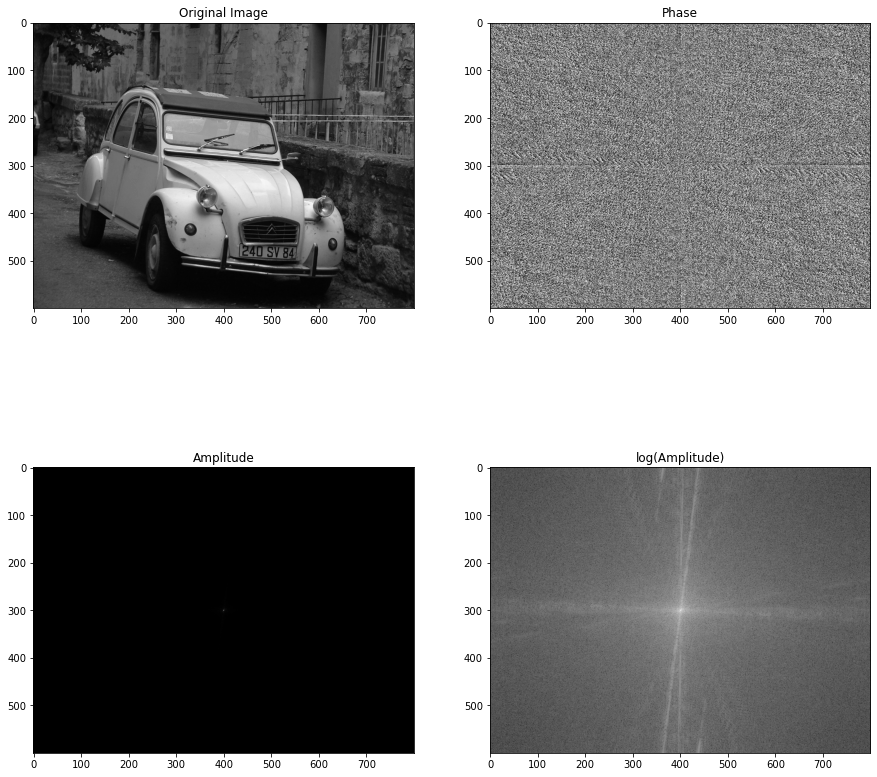

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# YOUR CODE HERE
img_fft = np.fft.fftshift(np.fft.fft2(img))
amplitude = np.abs(img_fft)
log_amplitude = np.log(amplitude)
phase = np.angle(img_fft)

plt.figure(figsize=(15, 15))
plt.gray()

plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(2,2,2)
plt.title("Phase")
plt.imshow(phase)

plt.subplot(2,2,3)
plt.title("Amplitude")
plt.imshow(amplitude)

plt.subplot(2,2,4)
plt.title("log(Amplitude)")
plt.imshow(log_amplitude)

plt.show()

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.fft import fft2, ifft2

img = plt.imread('images/dolly.png')

# transform to freq space and back to spacial domain
img_freq = fft2(img)
img_back_from_freq = np.real(fft2(img_freq))
restored_img = np.real(ifft2(img_freq))

# print matrices
print("img_back_from_freq-array")
print(img_back_from_freq)
print(20* "-")
print("restored_img-array")
print(restored_img)

# plot results
fig, axs = plt.subplots(1, 3)
plt.gray()

axs[0].title.set_text("original image")
axs[0].imshow(img)

axs[1].title.set_text("back from phase")
axs[1].imshow(img_back_from_freq)

axs[2].title.set_text("restored img")
axs[2].imshow(restored_img)

plt.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: 'images/dolly.png'

If the fft2-Algorithm is simply used again on the image, the image has a rotation of 180 degrees as well as a non-normalized matrix. So, there are two things to consider:

1) 180 degree problem:
This problem occurs if the wrong function is used. In Fourier-Transformation theory, an inverse function is defined to retransform the image back from the frequency space to the spatial domain. The inverse function is quite similar to the FT-function from spatial to frequency domain, but the exponant has a positive sign. This results in a rotation in 2d-space.

2) non-noramlized matrix:
Here in the picture (e.g. "back from phase") the non-normalization is indirectly done by matplotlib so the problem does not occur in the picture.. Therefore, the matrices are posted above. <br>
This is due to a common practice in FFT algorithms. A noramlization is needed when transforming to frequency space and back. Therefore, it has been decided to leave the normalization-factor to the inverse-function.

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2

img = plt.imread('images/dollySquared.jpg')

img_freq = fft2(img)
amplitude = np.abs(img_freq)
freq_img= np.angle(img_freq)

# define phase shifts
phase_shifts = {"0": 0, "pi/4": np.pi/4, "pi/2": np.pi/2, "pi": np.pi}

# get frequencies
frequencies = list()
for _, phase_shift in phase_shifts.items():
    img_phase = freq_img + phase_shift
    freq = amplitude * np.exp(1j * img_phase)
    frequencies.append(freq)

# plot results
fig, axs = plt.subplots(1, len(frequencies))
plt.gray()

for i in range(len(frequencies)):
    restored_img = np.real(ifft2(frequencies[i]))
    axs[i].imshow(restored_img)
    axs[i].title.set_text(list(phase_shifts.keys())[i])
    
plt.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: 'images/dollySquared.jpg'

**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


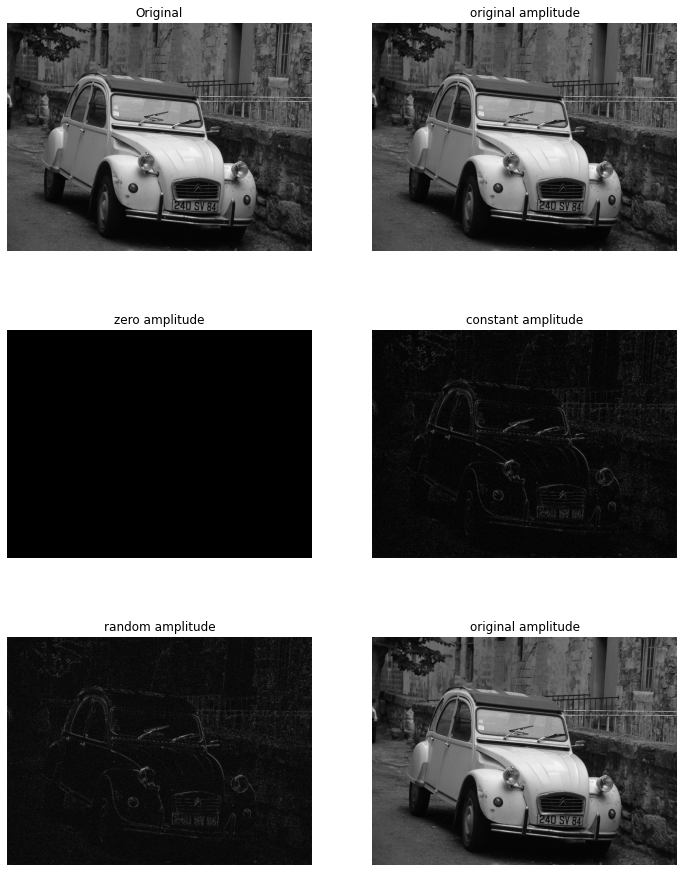

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

The amplitude is mathematically the maximum of the waves (waves in the frequency space of the image). The amplitude therefore affects the brightness of the image and results in darker images if the amplitude is set to a low value.

## Exercise 2: Implementing Fourier Transform [6 points]

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

* The FT transform a given function into a combination of (co-)sine functions. For this the function is transformed into the frequency space.
* The frequency space consists of waves with a given frequency in horizontal and vertical direction (for 2d).
* Therefore, a point in the frequency space describes a sine function.

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

100


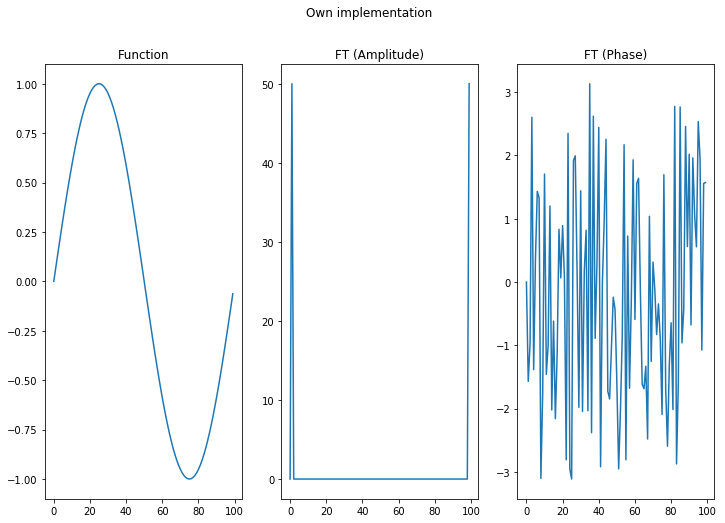

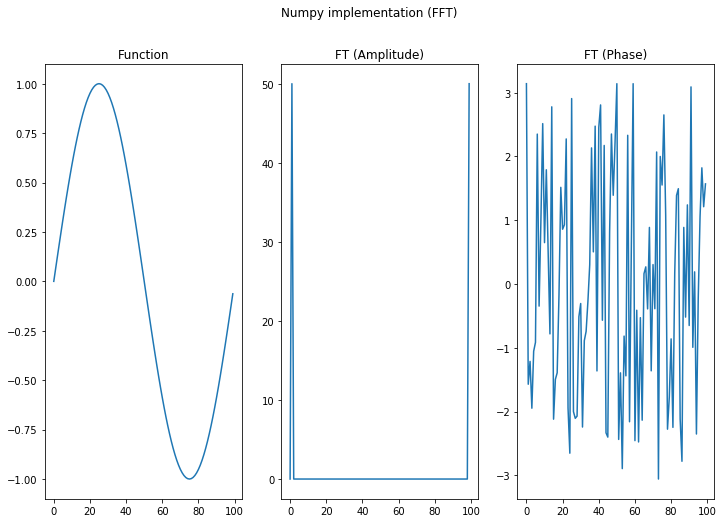

In [1]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    ft = np.zeros(func.shape, dtype=complex)
    
    # YOUR CODE HERE
    L = func.shape[0]
    print(L)
    for n in range(L):
        
        for x in range(L):
            ft[n] += func[x] * np.exp(-(2 * np.pi* 1j * n / L) * x)

    return ft


# number of points
L = np.arange(100)


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


func = np.sin(2 * np.pi * L / len(L))
#func = np.zeros(L.shape)
#func[40:60] = 1
#func = gaussian(L, 0, 10)

# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    
    Args:
        img (ndarray): Input image.
        
    Returns:
    
    """

    ft = np.zeros(img.shape)
   
    # YOUR CODE HERE
    M = img.shape[1]
    N = img.shape[0]
    
    for v in range(ft.shape[0]):
        for u in range(ft.shape[1]):
            for x in range(M):
                for y in range(N):
            
                    ft[v][u] += img[y][x] * np.exp(-(1j * 2 * np.pi * (u * x / M + v * y / N)))

    return ft


# Now (visually) compare your results with np.fft.fft2
img = plt.imread('images/dolly.png')

# YOUR CODE HERE
ft = fourier2d(img)

plt.figure(figsize=(15, 15))
plt.gray()

plt.subplot(1,2,1)
plt.title("fft2")
plt.imshow(np.fft.fft2(img))

plt.subplot(1,2,2)
plt.title("fourier2d")
plt.imshow(ft)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'images/dolly.png'

## Exercise 3: Convolution theorem [7 points]

**a)** What does the convolution theorem state and what are its practical consequences?

The convolution theorem states that the convolution of two functions can be done by mutiplication of their corresponding fourier transform and then use the inverse fourier transform on the result to get the convoluted function in the spatial domain. <br>
This is very practical because algortihms are very fast to find the fourier transform of a function. After that, a simple multiplication in the frequency domain of these two functions results in the fourier transform of our function that we want to calculate. A simple inverse fourier transform on the resulting function in the frequency domain gives us our result in the spatial domain. Therefore, the computational power required for the convolution of two functions is largely reduced. <br>

In addition, another advantage is seen in the use of filter (like highpass-filter, lowpass-filter, etc..). In the frequency domain, one can very good visualize the filter functions and immediately understand the concept behind such filters.

**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

The resulting wave of the combination of the sine waves is, just as the sine waves themselves, infinite, so that there is no real border. Therefore, boundary pixels will be handled by periodic continuation of the sine waves. This happens automatically for multiplying image and kernel in frequency space

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


YOUR ANSWER HERE

**d)** Proof the convolution theorem.

Given: 
$g(x) = f(x) \circledast h(x) = \int_{-\infty }^{\infty} f(\tau)h(x-\tau) \, d \tau$

Solution (starting with Fourier-Transform-Function):
$$
\begin{eqnarray}
    G(u) & = & \int_{-\infty }^{\infty} g(x) e^{-i2\pi u x} \, dx \\
         & = & \int_{-\infty }^{\infty} \int_{-\infty }^{\infty} f(\tau)h(x-\tau) e^{-i2\pi u x} \, d\tau dx \\
         & = & \int_{-\infty }^{\infty} f(\tau) e^{-i2\pi u \tau} d\tau \int_{-\infty }^{\infty} h(x-\tau) e^{-i2\pi u (x-\tau)} dx \\
         & = & F(u) H(u)
\end{eqnarray}
$$

The equations explained: (sorry, the numbering is switched off for some reason.. i could not figure it out) <br>
We start in first line with the fourier transform of function g(x). Afterwards we get an equation with two integrals. <br>
In the exponent of "e" we add a "+$\tau$" and a "-$\tau$" (resulting in 0). <br>
Then we split the integrals and we see that these two integrals are simply the fourier transformation of f(x) and h(x-$\tau$).

## Exercise 4: Filter design and frequency space[6 points]

**a)** Create and plot the kernels of box filter and binomial filter in frequency space. Vary the the kernel size. What do you observe?

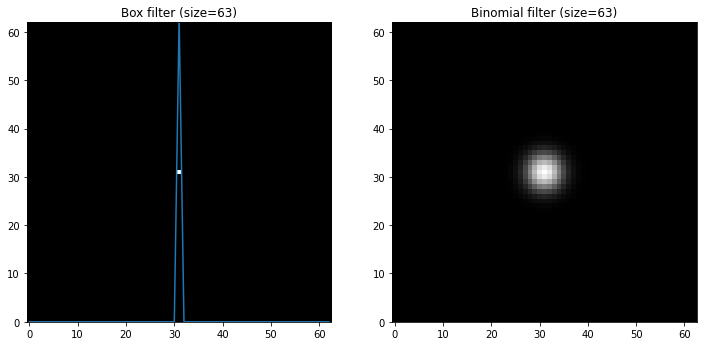

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

kernel_size = 63 # vary this
image_size = kernel_size # This is just done to prevent any IndexError

# compute the kernel
box_kernel = np.ones((image_size,image_size))       # Why image_size X image_size?
binomial_kernel = np.zeros((image_size,image_size)) # Why image_size X image_size?

# YOUR CODE HERE
box_kernel *= 1 / (kernel_size * kernel_size)

binom_horizontal = np.zeros(kernel_size)
binom_vertical = np.zeros((kernel_size, 1))

# compute horizontal component of the binomial filter
for i in range(kernel_size):
    binom_horizontal[i] = binom(kernel_size - 1, i)

# compute vertical component of the binomial filter
for j in range(kernel_size):
    binom_vertical[j][0] = binom(kernel_size - 1, j)

binomial_kernel = binom_vertical * binom_horizontal


        
box_frequencies = np.fft.fftshift(np.fft.fft2(box_kernel))
binomial_frequencies = np.fft.fftshift(np.fft.fft2(binomial_kernel))

# plot kernel in frequency space
plt.figure(figsize=(12,6))
plt.gray()
plt.subplot(1,2,1)
plt.title(f"Box filter (size={kernel_size})")
plt.imshow(np.abs(box_frequencies))
plt.plot(np.arange(image_size), np.abs(box_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.subplot(1,2,2)
plt.title(f"Binomial filter (size={kernel_size})")
plt.imshow(np.abs(binomial_frequencies))
plt.plot(np.arange(image_size), np.abs(binomial_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.show()

* The box filter seems to stay at the same size even with higher kernel size
* The binomial filter gets more sharp, so it gets bigger/more defined with increasing kernel sizes

**b)** Implement a low pass filter and apply it to the given image with different cut off frequencies $F_\max$. What do you observe? Explain that observation and discuss how to improve the result.

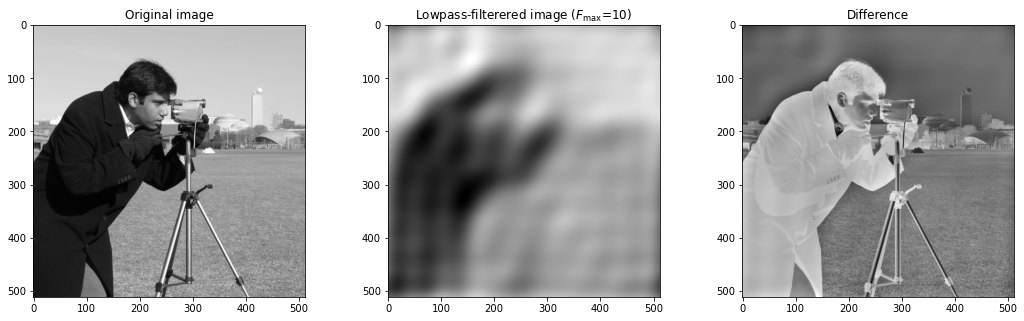

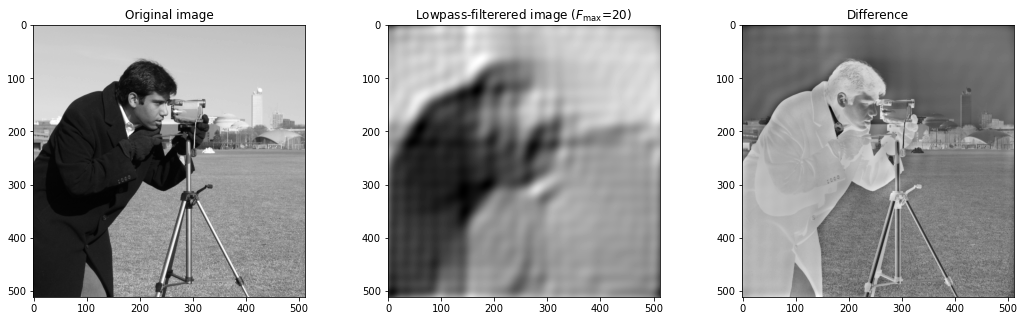

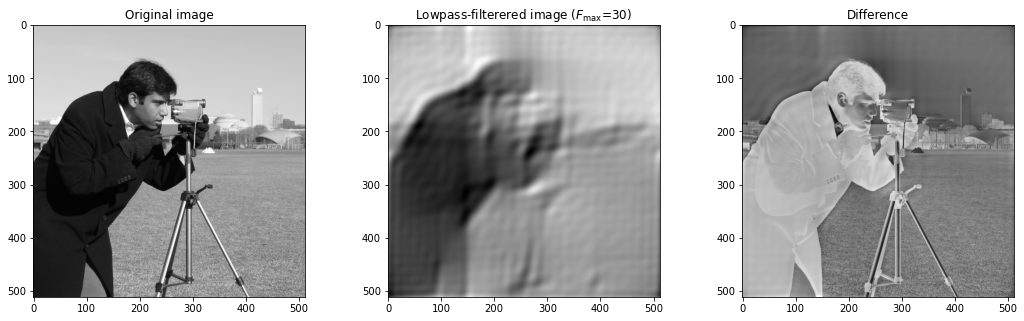

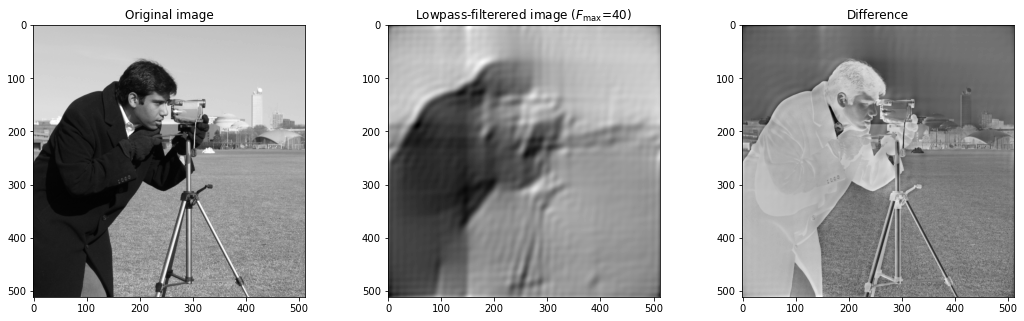

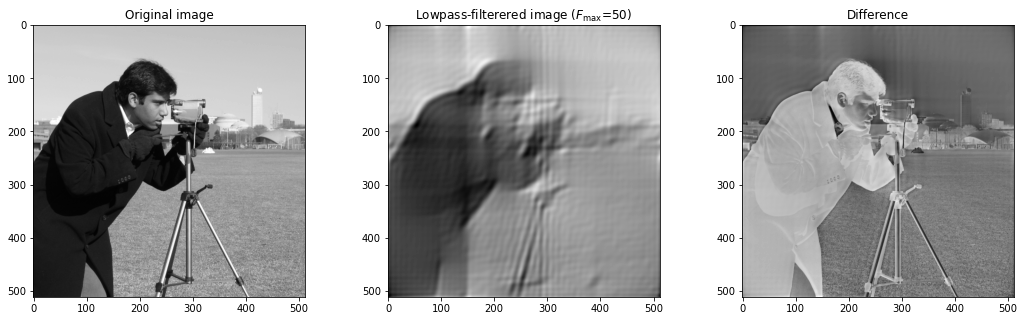

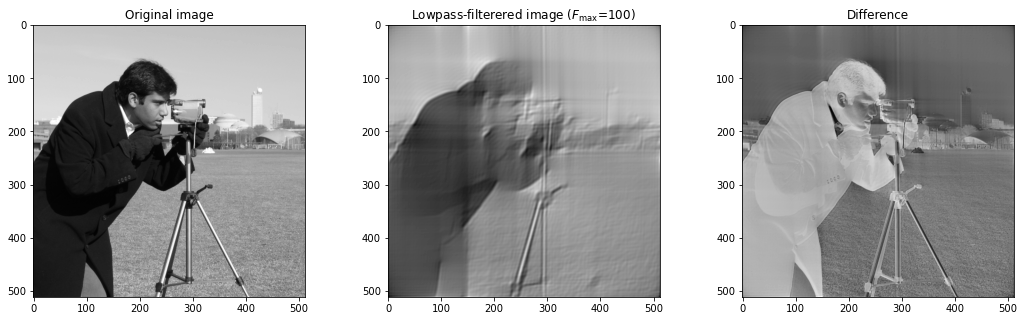

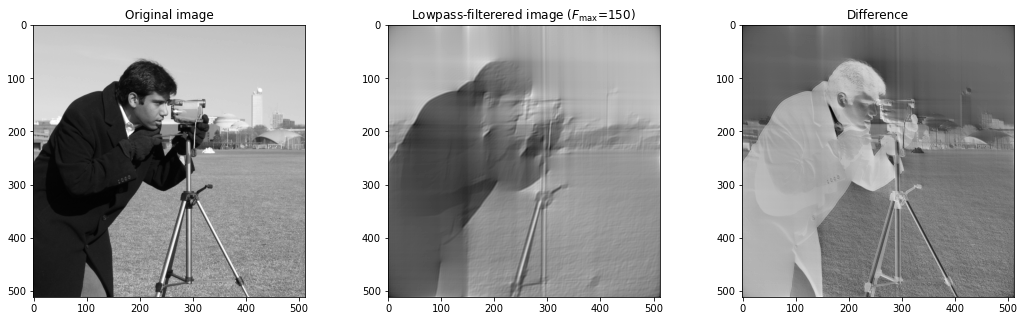

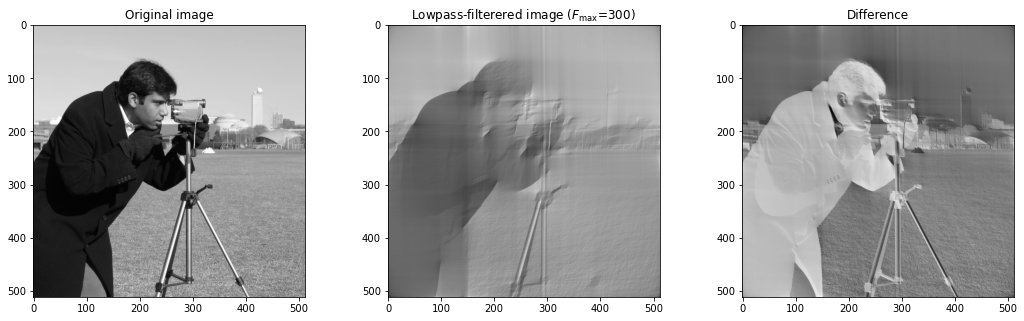

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

f_max = 30
image = imageio.imread('imageio:camera.png')


def low_pass_filter(image, f_max):
    result = np.zeros(image.shape)
    # YOUR CODE HERE
    # Get the fourier trasnform of the image
    image_fft = np.fft.fft2(image)
    
    # Filter out frequencies above f_max
    for y in range(image_fft.shape[0]):
        for x in range(image_fft.shape[1]):
            # x + y is the total frequency (frequency in horizontal + vertical direction)
            if abs(y + x) > f_max:
                image_fft[y][x] = 0 + 0.0j
    
    result = np.real(np.fft.ifft2(image_fft))

    return result, image_fft

cut_off_frequencies = [10, 20, 30, 40, 50, 100, 150, 300]
img_fft = np.zeros(image.shape)

for i in range(len(cut_off_frequencies)):
    f_max = cut_off_frequencies[i]

    filtered_image, img_fft = low_pass_filter(image, f_max=f_max)
    
    img_fft = np.fft.fftshift(img_fft)

    # plot kernel in frequency space
    plt.figure(figsize=(18,5))
    plt.gray()
    plt.subplot(1,3,1); plt.title(f"Original image")
    plt.imshow(image) 
    plt.subplot(1,3,2); plt.title(f"Lowpass-filterered image ($F_\max$={f_max})")
    plt.imshow(filtered_image)
    plt.subplot(1,3,3); plt.title(f"Difference")
    plt.imshow(filtered_image-image)

The image gets more blurry, the more frequencies are cut off. Some additional lines seem to appear in the transformed image, that are not in the original image. Some features of the image are completely gone (i.e. the right stand of the camera)

**c)** What is a good kernel size for a Gaussian filter? Justify your answer.

There is not a specific "good" size of Gaussian filter. A good size depends on the context in which the filter is used. If the image is noisy and needs to be smoothed a relatively small filter (i.e. $5 \times 5$ or $7 \times 7$) works better than a bigger filter (i.e. $13 \times 13$). Otherwise, if the goal is to blurr an image, a bigger filter works better than a smaller one.

**d)** Describe impulse ("salt and pepper") noise and explain what kind of filter should be used to remove such noise.

In impulse noise, random pixels are set to the minimum or the maximum pixel value. One of the best ways to remove this noise is a median filter, because this filter most likely takes the "real" pixel values and ignores the impulse noise, since maximum and minimum values are rarely the median.

## Exercise 5: Applying Fourier Transform [Bonus]

If you solve this exercise you may leave out one of the other exercises.


**a)** In order to apply the Custom Structuring Element to our satelite image in Assignment 4 of Sheet 3 we had to rotate the image. We had to measure the rotation angle by hand. We can now do this automatically via Fourier Transform.

1. Apply Fourier transform to the `img_gray`. The resulting amplitude should show the angle of the black lines.

1. Try to automatically get the rotation angle from the Fourier space. There are different ways to achieve this.
   Hints:
   * You may threshold the amplitudes, to only keep “relevant” values. You can then compute the angle of the largest relevant value.
   * Alternatively, you may apply methods you know from other lectures to get the main component and compute its angle.

1. Rotate the image back to its originally intended orientation (`skimage.transform.rotate`).

In [ ]:
%matplotlib inline
import numpy as np
from skimage import color
from skimage.transform import hough_line
from skimage.transform import rotate
import matplotlib.pyplot as plt

img = plt.imread('images/landsat_stack2.png')
img_gray = color.rgb2gray(img)

# YOUR CODE HERE

plt.show()

**b)** Can you think of other applications of Fourier Transform in Computer Vision?

YOUR ANSWER HERE